In [1]:
%pylab inline
import pylab as plt

/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import geopandas as gp
from datetime import datetime
import json
from code.iteration import iterate, iteration, update_data
from code.misc.logger import getLogger
# from code.misc.preparation import prepare
from code.main import data_preload, getSettings
from code.misc import *
import sys
__appname__ = "AVENTIKA_PRIORITY"
__author__ = "Phipipp Kats (casyfill)"
__version__ = "0.9.7.01 testing"

LIMIT = None  # manual execution bound

from code.misc.poi import getPOI, adjustScore

In [4]:
settings = getSettings()
start = datetime.now()  # start of the calculations
settings['limit'] = LIMIT
# settings['logger'] = getLogger()

In [5]:
poi, buff, reg = data_preload(settings)

In [6]:
p = adjustScore(getPOI(buff, poi, settings), settings)
p

2016-12-28 08:50:56,883 - root - INFO -    Pool:2 workers


,type,office_id,score,pid
0,foot,1,80.0,3
2,foot,3,80.0,3
1,foot,2,320.0,2
2,foot,3,320.0,2
2,foot,3,640.0,4
0,foot,1,1200.0,5
1,foot,2,1200.0,5
2,foot,3,1200.0,5
2,foot,3,800.0,1
3,stepless,1,1000.0,1


## Iteration 

In [ ]:
cntr = 1  # iteration counter

    # buffers of newly adopted offices will be added here iteratively
bound = settings['limit']
logger = settings['logger']
logger.info('Started iteration')


## Iteration

In [ ]:
cntr = 1  # iteration counter

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
buff, poi = update_data(buff, poi, bid, s_pois)
cntr += 1

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
buff, poi = update_data(buff, poi, bid, s_pois)
cntr += 1

In [ ]:
bid, score, reg_score, f_pois, s_pois = iteration(cntr, buff, poi,
                                                          reg, settings)


In [ ]:
bid

In [ ]:
buff

In [ ]:
bid = 2

In [ ]:
# buff, poi = update_data(buff, poi, bid, s_pois)
# cntr += 1

In [ ]:
slct = buff.loc[idx[:, bid], :]  # selected Office
slct

In [ ]:
buff = buff[buff.index.get_level_values(1) != bid]

In [ ]:
buff

In [ ]:
buff.empty

In [ ]:
getReg_overlayed(buff, reg, settings)

## Iterate

In [7]:

bid, score, r_score, foot_pois, stepless_pois, stepless_regs = iteration(1, buff, poi, reg, settings)

2016-12-28 08:51:02,824 - root - INFO - Priority 1: bank office 3, score: 4235.0


In [10]:
'|'.join([str(x) for x in foot_pois])

'3|2|4|5|1'

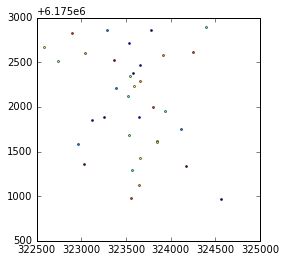

In [14]:
reg.plot()

In [30]:
buff, poi, reg = update_data(buff, poi, reg, bid, stepless_pois, stepless_regs)

In [31]:
poi.shape

(4, 4)

In [32]:
reg.shape

(35, 4)

In [33]:
bid, score, r_score, foot_pois, stepless_pois, stepless_regs = iteration(1, buff, poi, reg, settings)

TypeError: 'NoneType' object has no attribute '__getitem__'

In [13]:
z = pd.DataFrame(pd.Series({1:0, 2:0, 3:0}))
z

,0
1,0
2,0
3,0


In [14]:
y = pd.Series({1:12, 3:12})
y

1    12
3    12
dtype: int64

In [15]:
z[0] = y

In [16]:
z

,0
1,12.0
2,NaN
3,12.0


In [17]:
b = gp.read_file('../data/real/raw/banks.geojson')

In [20]:
b['type'].value_counts()

Банкомат                      1480
Отделение                      744
Отделение самообслуживания     167
Name: type, dtype: int64

In [23]:
bankomat_oids = b[b['type']==u'Банкомат']

In [24]:
bankomat_oids

,address,bankomat_adapt,brail,dist_button,geometry,info,name,office_id,pandus,shop_intersect,sound,type,us_disabled,us_visual,vis_rasmetka,visual,vsp
4,"г. Москва,Улица Снежная 26",0,0,0,POINT Z (37.653361 55.854961 0),0,Банкомат 11108742,906,0,,0,Банкомат,0,0,1,0,Банкомат 11108742
5,"г. Москва,Улица Садовническая 33",0,0,0,POINT Z (37.637596 55.745605 0),0,Банкомат 381563,1096,0,,0,Банкомат,0,0,1,0,Банкомат 381563
7,"г. Москва,Улица Малышева 3",0,0,0,POINT Z (37.742178 55.702729 0),0,Банкомат 650142,1732,0,,0,Банкомат,0,0,1,0,Банкомат 650142
8,"г. Мамыри, 41 Км Мкад",0,0,0,POINT Z (37.491129 55.603921 0),0,Банкомат 688711,896,0,true,0,Банкомат,0,0,1,0,Банкомат 688711
9,"г. Москва,Проспект Рязанский 2",0,0,0,POINT Z (37.737309 55.730365 0),0,Банкомат 830351,978,0,,0,Банкомат,0,0,1,0,Банкомат 830351
10,"г. Москва,Улица Снежная 27",0,0,0,POINT Z (37.653334 55.856351 0),0,Банкомат 689787,2075,0,true,0,Банкомат,0,0,1,0,Банкомат 689787
11,"г. Москва,Дорога Мкад 87 Км 8",0,0,0,POINT Z (37.629449 55.898668 0),0,Банкомат 101457,2200,0,,0,Банкомат,0,0,1,0,Банкомат 101457
12,"г. Москва,Улица Ратная 16 2",0,0,0,POINT Z (37.571147 55.576783 0),0,Банкомат 830267,2273,0,,0,Банкомат,0,0,1,0,Банкомат 830267
13,"г. Москва,Бульвар Осенний",1,0,0,POINT Z (37.407465 55.757977 0),0,Банкомат 10155466,59,0,,0,Банкомат,0,0,1,0,Банкомат 10155466
14,"г. Москва,Шоссе Каширское 142 1",0,0,0,POINT Z (37.72263 55.597398 0),0,Банкомат 975692,1318,0,,0,Банкомат,0,0,1,0,Банкомат 975692
